In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import glob
path = "/median_data"
csv_files = glob.glob("./median_data/*.csv")


In [88]:
df = pd.read_csv("./median_data/file.csv",header=0,index_col=2)


In [89]:
for file in csv_files:
    temp = pd.read_csv(file,names=["stationid","value","year"],index_col=2)
    df = pd.concat([df,temp],ignore_index=False)

In [3]:
columns = ["StationId","Date","temp","value","a","b","c","d"]

df = pd.read_csv("./data/1902.csv.gz",compression="gzip",names=columns)

In [14]:
df.groupby(["StationId"])["temp"].count()

StationId
AGE00135039    1071
AGE00147705    1065
AGE00147706    1042
AGE00147708    1062
AGE00147709    1065
               ... 
USW00094701    1825
USW00094728    1464
USW00094967    1405
UZM00038457    1460
UZM00038618     668
Name: temp, Length: 8990, dtype: int64

In [10]:
dataset = pd.read_csv("./all_median_data/all_combined_data.csv",names=["stationid","temperature","year"],index_col=2)


In [11]:
dataset["temperature"] = dataset["temperature"]/10

In [12]:
dataset

,stationid,temperature
year,,
1902,AU000005010,11.9
1902,USC00218419,9.7
1902,USC00445121,21.1
1902,USC00451830,13.3
1902,AGE00135039,22.0
...,...,...
2021,AU000005010,14.8
2021,USC00218419,11.1
2021,USC00445121,0.0


In [13]:
dataset["temperature"].replace(0,np.nan)

year
1902    11.9
1902     9.7
1902    21.1
1902    13.3
1902    22.0
        ... 
2021    14.8
2021    11.1
2021     NaN
2021     NaN
2021     NaN
Name: temperature, Length: 605, dtype: float64

In [14]:
dataset["stand_temp"] = dataset["temperature"].sub(dataset.groupby(["stationid"])["temperature"].transform("mean"))

In [15]:
dataset

,stationid,temperature,stand_temp
year,,,
1902,AU000005010,11.9,-1.346281
1902,USC00218419,9.7,-0.542562
1902,USC00445121,21.1,13.603306
1902,USC00451830,13.3,11.906612
1902,AGE00135039,22.0,13.409091
...,...,...,...
2021,AU000005010,14.8,1.553719
2021,USC00218419,11.1,0.857438
2021,USC00445121,0.0,-7.496694


In [16]:
dataset.drop(["temperature"],axis=1,inplace=True)

In [145]:
dataset[dataset["stand_temp"] < -5]

,stationid,stand_temp
year,,
1918,AGE00135039,-9.177686
1926,AGE00135039,-5.177686


In [150]:
s = dataset[dataset["stationid"]!="AGE00135039"]

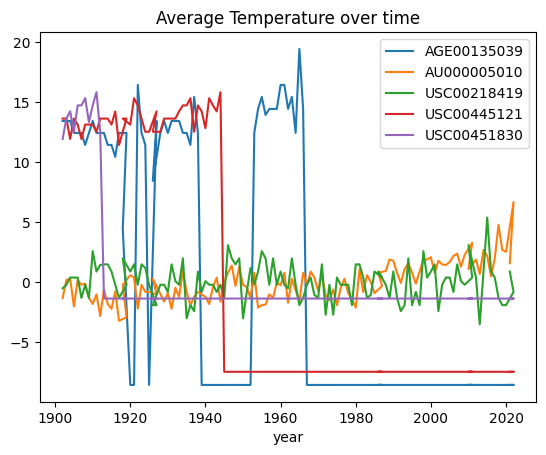

In [17]:
ax =dataset.groupby(["stationid"])["stand_temp"].plot(kind='line',title="Average Temperature over time",legend=True)

<Axes: xlabel='year'>

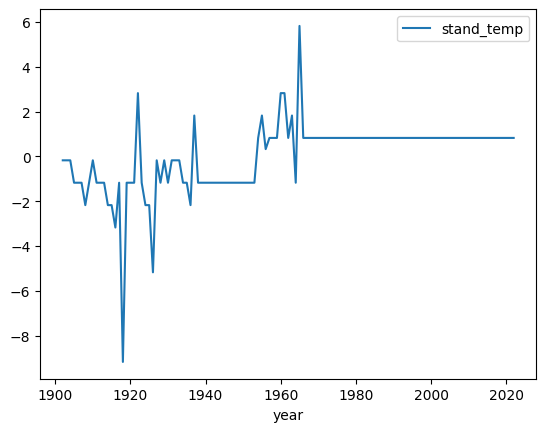

In [153]:
dataset[dataset["stationid"]=="AGE00135039"].plot.line()

<Axes: xlabel='year'>

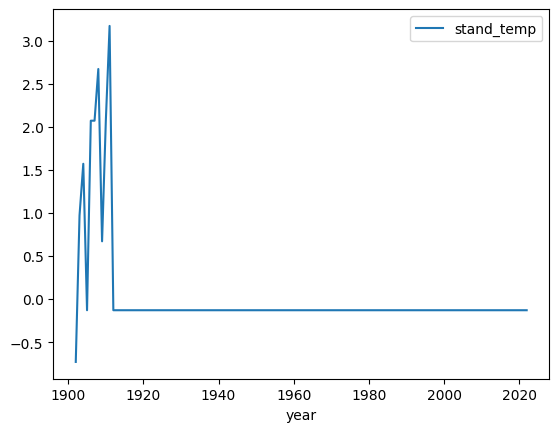

In [157]:
dataset[dataset["stationid"]=="USC00451830"].plot.line()